In [1]:
import xml.etree.ElementTree as et
import tkinter.filedialog
import numpy as np
import pandas as pd

import scipy.cluster
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import ClusterWarning
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy



from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer



import gower
import qgrid
import scipy.cluster.hierarchy as sch




import matplotlib.pyplot as plt
from warnings import simplefilter



simplefilter("ignore", ClusterWarning)


label_encoder = preprocessing.LabelEncoder()
scalar = preprocessing.MinMaxScaler()


In [2]:
def get_xml_root():
    etree = et.parse(tkinter.filedialog.askopenfilename())
    return etree.getroot()

In [3]:
def get_rules(xml_root):
    rule_attr_list = [xml.attrib for xml in xml_root.iter('rule')]
    rule_attr_dict = rule_attr_list.copy()
    rule_attr_data_frame = pd.DataFrame(list(rule_attr_dict))
    return rule_attr_data_frame

In [4]:
def get_attributes(xml_root):
    attribute_attr_list = [a.attrib for a in xml_root.find('attributes').iter('name')]
    attribute_attr_dict = attribute_attr_list.copy()
    attributes_attr_data_frame = pd.DataFrame(list(attribute_attr_dict))
    attributes_attr_data_frame.drop('valueID', axis='columns', inplace=True)
    attributes_attr_data_frame.dropna(subset=['attributeID'], inplace=True)
    return attributes_attr_data_frame

In [5]:
def init_rule_matrix(rule_data_frame, attribute_data_frame):
    for x in attribute_data_frame.values:
        rule_data_frame['attribute_' + x] = np.nan
    return rule_data_frame


In [6]:
def get_rule_by_id(xml_root, id_rule):
    for rule in xml_root.iter('rule'):
        if rule.attrib['ruleID'] == id_rule:
            return rule

In [7]:
def populate_matrix_with_conditions(xml_root, data_frame):
    for i in range(len(list(data_frame.ruleID))):
        for k in list(get_rule_by_id(xml_root, data_frame.ruleID[i]).find('conditions')):
            data_frame.loc[
                data_frame['ruleID'] == data_frame.ruleID[i], str(
                    'attribute_' + list(k)[0].attrib['attributeID'])] = list(k)[2].text
    return data_frame



In [8]:
def populate_matrix_with_conclusions(xml_root, data_frame):
    for i in range(len(list(data_frame.ruleID))):
        for k in list(get_rule_by_id(xml_root, data_frame.ruleID[i]).find('conclusion')):
            data_frame.loc[
                data_frame['ruleID'] == data_frame.ruleID[i], str(
                    'attribute_' + list(k)[0].attrib['attributeID'])] = list(k)[2].text
    return data_frame


In [9]:
def normilize_types_of_column_values(data_frame, column):
    try:
        data_frame[column] = pd.to_numeric(data_frame[column], downcast="float")
    except:
        data_frame[column] = data_frame[column].astype(str)
    

In [10]:
def get_simbolic_values(xml_root):
    symbolic_value = []
    t = [a for a in xml_root.find('attributes').iter('symbolic_value')]
    for x in range(len(list(t))):
        symbolic_value.append(list(t)[x].find('name').text)
    return set(symbolic_value)
    
    
    

In [11]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [12]:
if __name__ == '__main__':
    root = get_xml_root()
    symbolic_value = list(get_simbolic_values(root))
    rule_attrs = get_rules(root)
    attribute_attrs = get_attributes(root)
    init_data = init_rule_matrix(rule_attrs, attribute_attrs)
    populate_matrix_with_conditions(root, init_data)
    

In [13]:
data = populate_matrix_with_conclusions(root, init_data)

In [14]:
data.to_excel(r'export_dataframe.xlsx', index = False, header=True)

In [15]:
data.drop(data.columns[[0]], axis = 1, inplace = True)

In [16]:
data

,ruleID,attribute_426,attribute_427,attribute_428,attribute_429,attribute_430,attribute_431,attribute_432,attribute_433,attribute_434,...,attribute_450,attribute_451,attribute_452,attribute_453,attribute_454,attribute_455,attribute_456,attribute_457,attribute_458,attribute_459
0,1878,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1879,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1880,NaN,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1881,NaN,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1882,NaN,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000,NaN,NaN,NaN,rozmowa dyscyplinująca,zwolnienie
412,2290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000,NaN,NaN,NaN,rozmowa dyscyplinująca,zwolnienie
413,2291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000,NaN,NaN,NaN,program naprawczy,zwolnienie
414,2292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000,NaN,NaN,NaN,program naprawczy,zwolnienie


In [17]:
gower_data = data

In [18]:
gower_data.set_index('ruleID')

,attribute_426,attribute_427,attribute_428,attribute_429,attribute_430,attribute_431,attribute_432,attribute_433,attribute_434,attribute_435,...,attribute_450,attribute_451,attribute_452,attribute_453,attribute_454,attribute_455,attribute_456,attribute_457,attribute_458,attribute_459
ruleID,,,,,,,,,,,,,,,,,,,,,
1878,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1879,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880,NaN,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000,NaN,NaN,NaN,rozmowa dyscyplinująca,zwolnienie
2290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000,NaN,NaN,NaN,rozmowa dyscyplinująca,zwolnienie
2291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000,NaN,NaN,NaN,program naprawczy,zwolnienie


In [19]:
gdistance = gower.gower_matrix(gower_data)

C:\Users\Irakli\anaconda3\lib\site-packages\gower\gower_dist.py:51: RuntimeWarning: All-NaN slice encountered
  max = np.nanmax(col_array)
C:\Users\Irakli\anaconda3\lib\site-packages\gower\gower_dist.py:52: RuntimeWarning: All-NaN slice encountered
  min = np.nanmin(col_array)


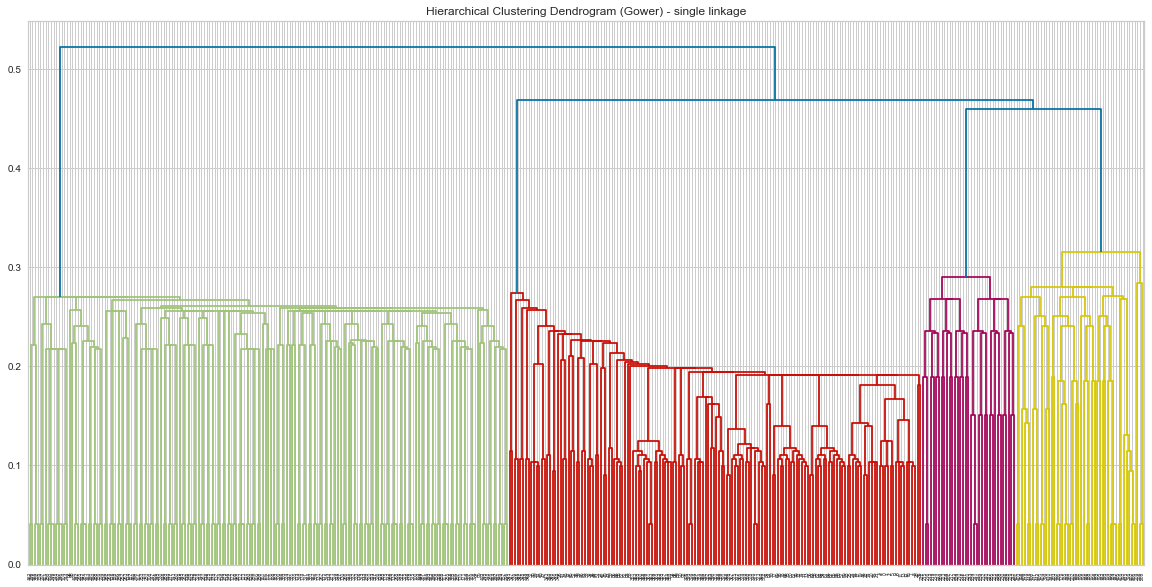

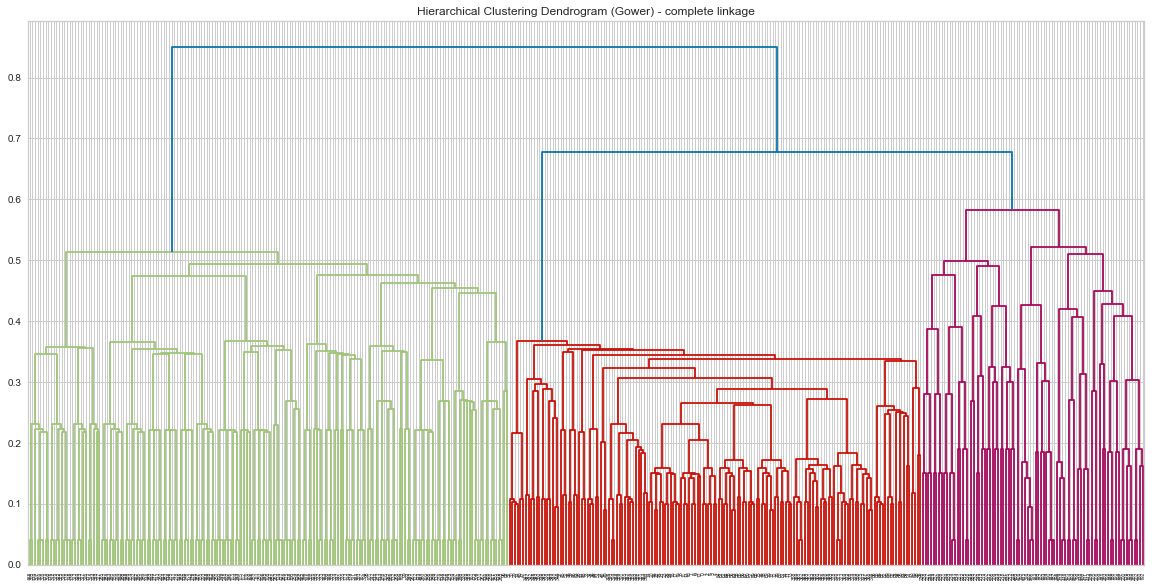

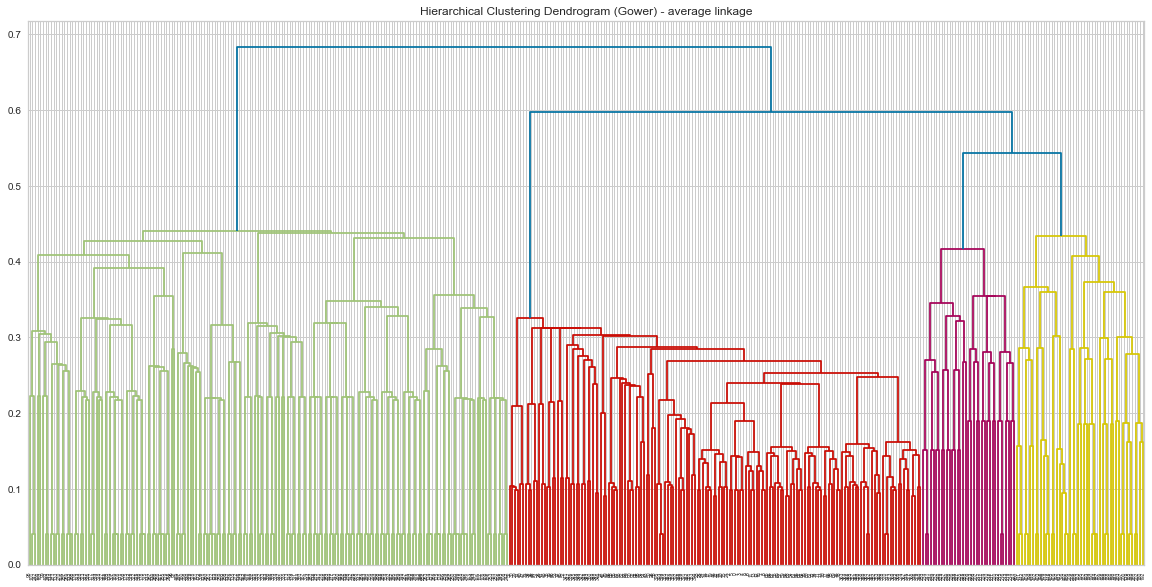

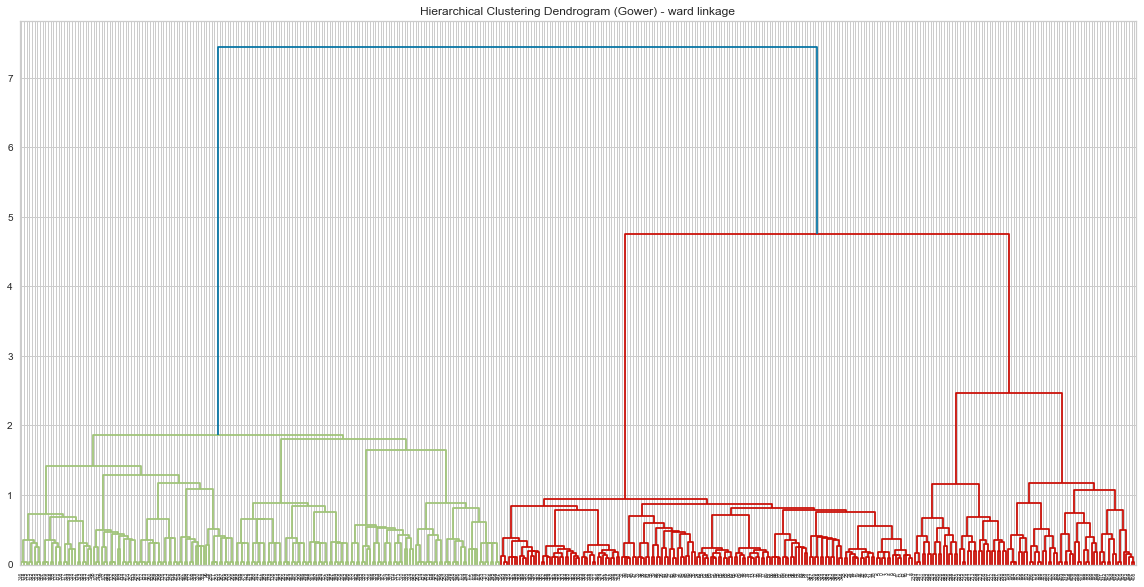

In [20]:
for g_linkage in ('single', 'complete', 'average', 'ward'):
    clusters = scipy.cluster.hierarchy.linkage(gdistance, method=g_linkage)
    plt.figure(figsize=(20,10))
    plt.title(f'Hierarchical Clustering Dendrogram (Gower) - {g_linkage} linkage')
    dn = hierarchy.dendrogram(clusters)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ruleID         416 non-null    object 
 1   attribute_426  2 non-null      object 
 2   attribute_427  4 non-null      object 
 3   attribute_428  8 non-null      object 
 4   attribute_429  12 non-null     object 
 5   attribute_430  14 non-null     object 
 6   attribute_431  14 non-null     object 
 7   attribute_432  14 non-null     object 
 8   attribute_433  14 non-null     object 
 9   attribute_434  0 non-null      float64
 10  attribute_435  0 non-null      float64
 11  attribute_436  0 non-null      float64
 12  attribute_437  0 non-null      float64
 13  attribute_438  290 non-null    object 
 14  attribute_439  6 non-null      object 
 15  attribute_440  12 non-null     object 
 16  attribute_441  20 non-null     object 
 17  attribute_442  26 non-null     object 
 18  attribute_

In [22]:
normalized_data = data

In [23]:
normalized_data.set_index('ruleID')

,attribute_426,attribute_427,attribute_428,attribute_429,attribute_430,attribute_431,attribute_432,attribute_433,attribute_434,attribute_435,...,attribute_450,attribute_451,attribute_452,attribute_453,attribute_454,attribute_455,attribute_456,attribute_457,attribute_458,attribute_459
ruleID,,,,,,,,,,,,,,,,,,,,,
1878,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1879,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880,NaN,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000,NaN,NaN,NaN,rozmowa dyscyplinująca,zwolnienie
2290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000,NaN,NaN,NaN,rozmowa dyscyplinująca,zwolnienie
2291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000,NaN,NaN,NaN,program naprawczy,zwolnienie


In [24]:
for column in data.columns:
    normilize_types_of_column_values(normalized_data, column)

In [25]:
normalized_data

,ruleID,attribute_426,attribute_427,attribute_428,attribute_429,attribute_430,attribute_431,attribute_432,attribute_433,attribute_434,...,attribute_450,attribute_451,attribute_452,attribute_453,attribute_454,attribute_455,attribute_456,attribute_457,attribute_458,attribute_459
0,1878.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan
1,1879.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan
2,1880.0,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan
3,1881.0,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan
4,1882.0,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000.0,nan,nan,nan,rozmowa dyscyplinująca,zwolnienie
412,2290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000.0,nan,nan,nan,rozmowa dyscyplinująca,zwolnienie
413,2291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000.0,nan,nan,nan,program naprawczy,zwolnienie
414,2292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20000.0,nan,nan,nan,program naprawczy,zwolnienie


In [26]:
# encode_categorical_values(data)
columns = list(data.columns)

In [27]:
columns

['ruleID',
 'attribute_426',
 'attribute_427',
 'attribute_428',
 'attribute_429',
 'attribute_430',
 'attribute_431',
 'attribute_432',
 'attribute_433',
 'attribute_434',
 'attribute_435',
 'attribute_436',
 'attribute_437',
 'attribute_438',
 'attribute_439',
 'attribute_440',
 'attribute_441',
 'attribute_442',
 'attribute_443',
 'attribute_444',
 'attribute_445',
 'attribute_446',
 'attribute_447',
 'attribute_448',
 'attribute_449',
 'attribute_450',
 'attribute_451',
 'attribute_452',
 'attribute_453',
 'attribute_454',
 'attribute_455',
 'attribute_456',
 'attribute_457',
 'attribute_458',
 'attribute_459']

In [28]:
numerical_columns = []
non_numerocal_columns = []
for col in columns:
    if np.issubdtype(data[col].dtype, np.number):
         numerical_columns.append(col)
    else:
        non_numerocal_columns.append(col)

In [29]:
# data[numerical_columns] = data[numerical_columns].fillna(float(0))

In [30]:
numerical_data = data[numerical_columns]

In [31]:
numerical_data = numerical_data.fillna(float(0))

In [32]:
numerical_data.set_index('ruleID')

,attribute_426,attribute_427,attribute_428,attribute_429,attribute_430,attribute_431,attribute_432,attribute_433,attribute_434,attribute_435,attribute_436,attribute_437,attribute_443,attribute_449,attribute_450,attribute_451,attribute_452,attribute_453,attribute_454
ruleID,,,,,,,,,,,,,,,,,,,
1878.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1879.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1880.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1882.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0
2290.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0
2291.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0


In [33]:
scalar.fit(numerical_data)

MinMaxScaler()

In [34]:
x = scalar.transform(numerical_data)

In [35]:
normalized_data[numerical_columns] = pd.DataFrame(x)

In [36]:
normalized_data

,ruleID,attribute_426,attribute_427,attribute_428,attribute_429,attribute_430,attribute_431,attribute_432,attribute_433,attribute_434,...,attribute_450,attribute_451,attribute_452,attribute_453,attribute_454,attribute_455,attribute_456,attribute_457,attribute_458,attribute_459
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan
1,0.002409,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan
2,0.004819,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan
3,0.007229,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan
4,0.009638,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0.990361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,nan,nan,nan,rozmowa dyscyplinująca,zwolnienie
412,0.992771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,nan,nan,nan,rozmowa dyscyplinująca,zwolnienie
413,0.995181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,nan,nan,nan,program naprawczy,zwolnienie
414,0.997590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,nan,nan,nan,program naprawczy,zwolnienie


In [37]:
for s in symbolic_value:
    for categorical in non_numerocal_columns:
        data.loc[data[categorical] == s, categorical] = symbolic_value.index(s)

In [38]:
 for categorical in non_numerocal_columns:
        data.loc[data[categorical] == 'nan', categorical] = 8

In [39]:
normalized_data

,ruleID,attribute_426,attribute_427,attribute_428,attribute_429,attribute_430,attribute_431,attribute_432,attribute_433,attribute_434,...,attribute_450,attribute_451,attribute_452,attribute_453,attribute_454,attribute_455,attribute_456,attribute_457,attribute_458,attribute_459
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,8,8,8,8
1,0.002409,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,8,8,8,8
2,0.004819,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,8,8,8,8
3,0.007229,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,8,8,8,8
4,0.009638,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0.990361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,8,8,8,1,2
412,0.992771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,8,8,8,1,2
413,0.995181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,8,8,8,7,2
414,0.997590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,8,8,8,7,2


In [40]:
indexed_data =  data.set_index(data.ruleID)

In [41]:
distance_mat = pd.DataFrame(distance_matrix(indexed_data.to_numpy(), indexed_data.to_numpy()), index=indexed_data.index, columns=indexed_data.index)

In [42]:
distance_mat

ruleID,0.000000,0.002409,0.004819,0.007229,0.009638,0.012048,0.014458,0.016867,0.019277,0.021687,...,0.978313,0.980723,0.983132,0.985542,0.987952,0.990361,0.992771,0.995181,0.997590,1.000000
ruleID,,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000,2.000001,3.872986,7.141432,5.196161,3.162301,8.306636,4.899009,6.708232,7.810280,...,10.721805,10.722025,10.722246,12.448747,10.342923,12.123564,12.123762,8.184765,10.343848,10.344080
0.002409,2.000001,0.000000,3.316626,7.416200,5.567769,2.449509,9.219552,6.324572,7.810268,8.774986,...,11.443443,11.443649,11.443855,13.075418,11.089242,12.766207,12.766394,9.109643,11.090103,11.090320
0.004819,3.872986,3.316626,0.000000,4.472137,2.828431,1.000026,8.717803,6.082774,6.324572,6.633271,...,11.829949,11.830147,11.830346,13.414985,11.487669,13.113783,13.113964,9.590663,11.488498,11.488707
0.007229,7.141432,7.416200,4.472137,0.000000,2.000001,5.385167,8.717801,6.708211,4.898994,3.464132,...,12.804023,12.804206,12.804389,14.281355,12.488467,13.998805,13.998975,10.769218,12.489228,12.489419
0.009638,5.196161,5.567769,2.828431,2.000001,0.000000,3.605552,8.000001,5.385170,4.472146,4.000018,...,11.829553,11.829751,11.829949,13.414633,11.487258,13.113421,13.113602,9.590167,11.488083,11.488290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.990361,12.123564,12.766207,13.113783,13.998805,13.113421,12.921188,13.998299,12.286077,13.112704,13.709060,...,4.472152,4.472146,4.472142,7.211104,4.000001,0.000000,0.002410,7.483316,9.380834,9.380836
0.992771,12.123762,12.766394,13.113964,13.998975,13.113602,12.921371,13.998468,12.286268,13.112883,13.709231,...,4.472159,4.472152,4.472146,7.211106,4.000003,0.002410,0.000000,7.483315,9.380833,9.380834
0.995181,8.184765,9.109643,9.590663,10.769218,9.590167,9.325586,10.768557,8.423604,9.589181,10.389788,...,4.472168,6.000017,6.000012,7.211109,6.324559,7.483316,7.483315,0.000000,4.000001,4.000003


In [43]:
distance_matrix(indexed_data.to_numpy(), indexed_data.to_numpy())

array([[0.00000000e+00, 2.00000145e+00, 3.87298634e+00, ...,
        8.18476539e+00, 1.03438477e+01, 1.03440804e+01],
       [2.00000145e+00, 0.00000000e+00, 3.31662567e+00, ...,
        9.10964294e+00, 1.10901030e+01, 1.10903195e+01],
       [3.87298634e+00, 3.31662567e+00, 0.00000000e+00, ...,
        9.59066297e+00, 1.14884984e+01, 1.14887069e+01],
       ...,
       [8.18476539e+00, 9.10964294e+00, 9.59066297e+00, ...,
        0.00000000e+00, 4.00000073e+00, 4.00000290e+00],
       [1.03438477e+01, 1.10901030e+01, 1.14884984e+01, ...,
        4.00000073e+00, 0.00000000e+00, 2.40993500e-03],
       [1.03440804e+01, 1.10903195e+01, 1.14887069e+01, ...,
        4.00000290e+00, 2.40993500e-03, 0.00000000e+00]])

In [92]:
# distance_mat


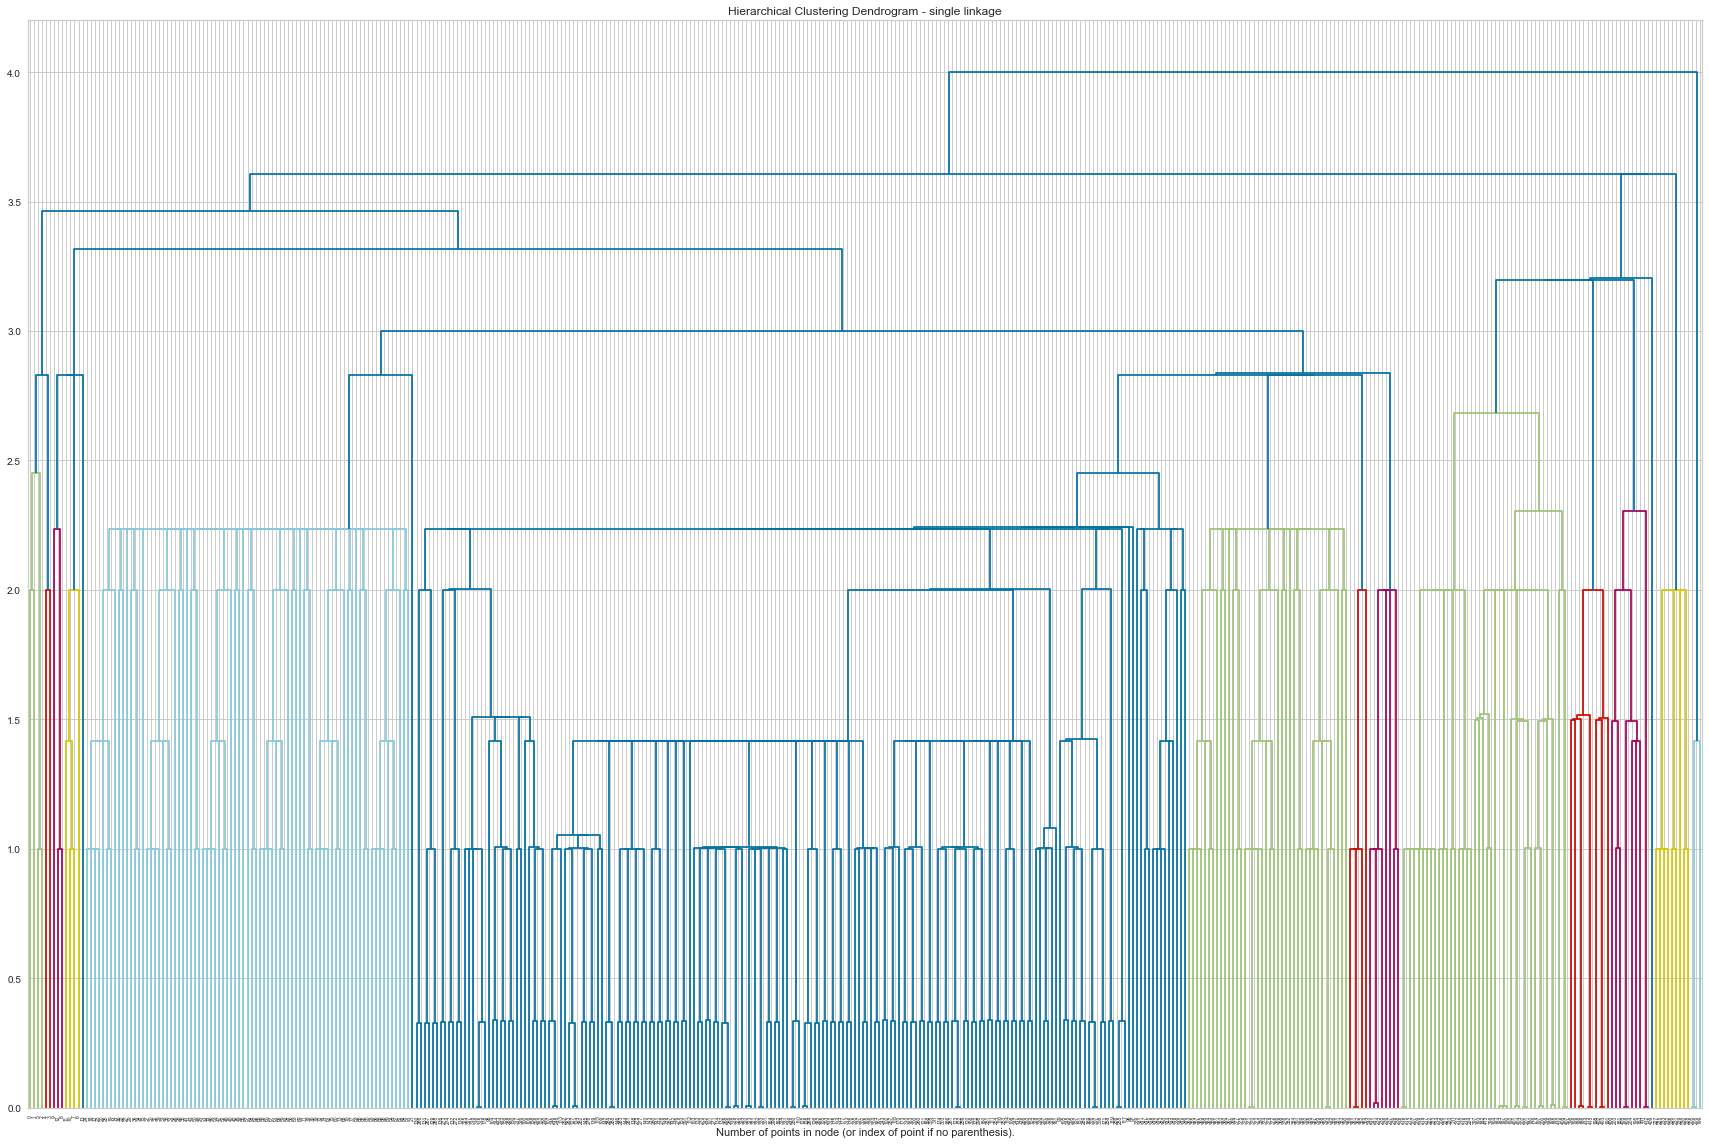

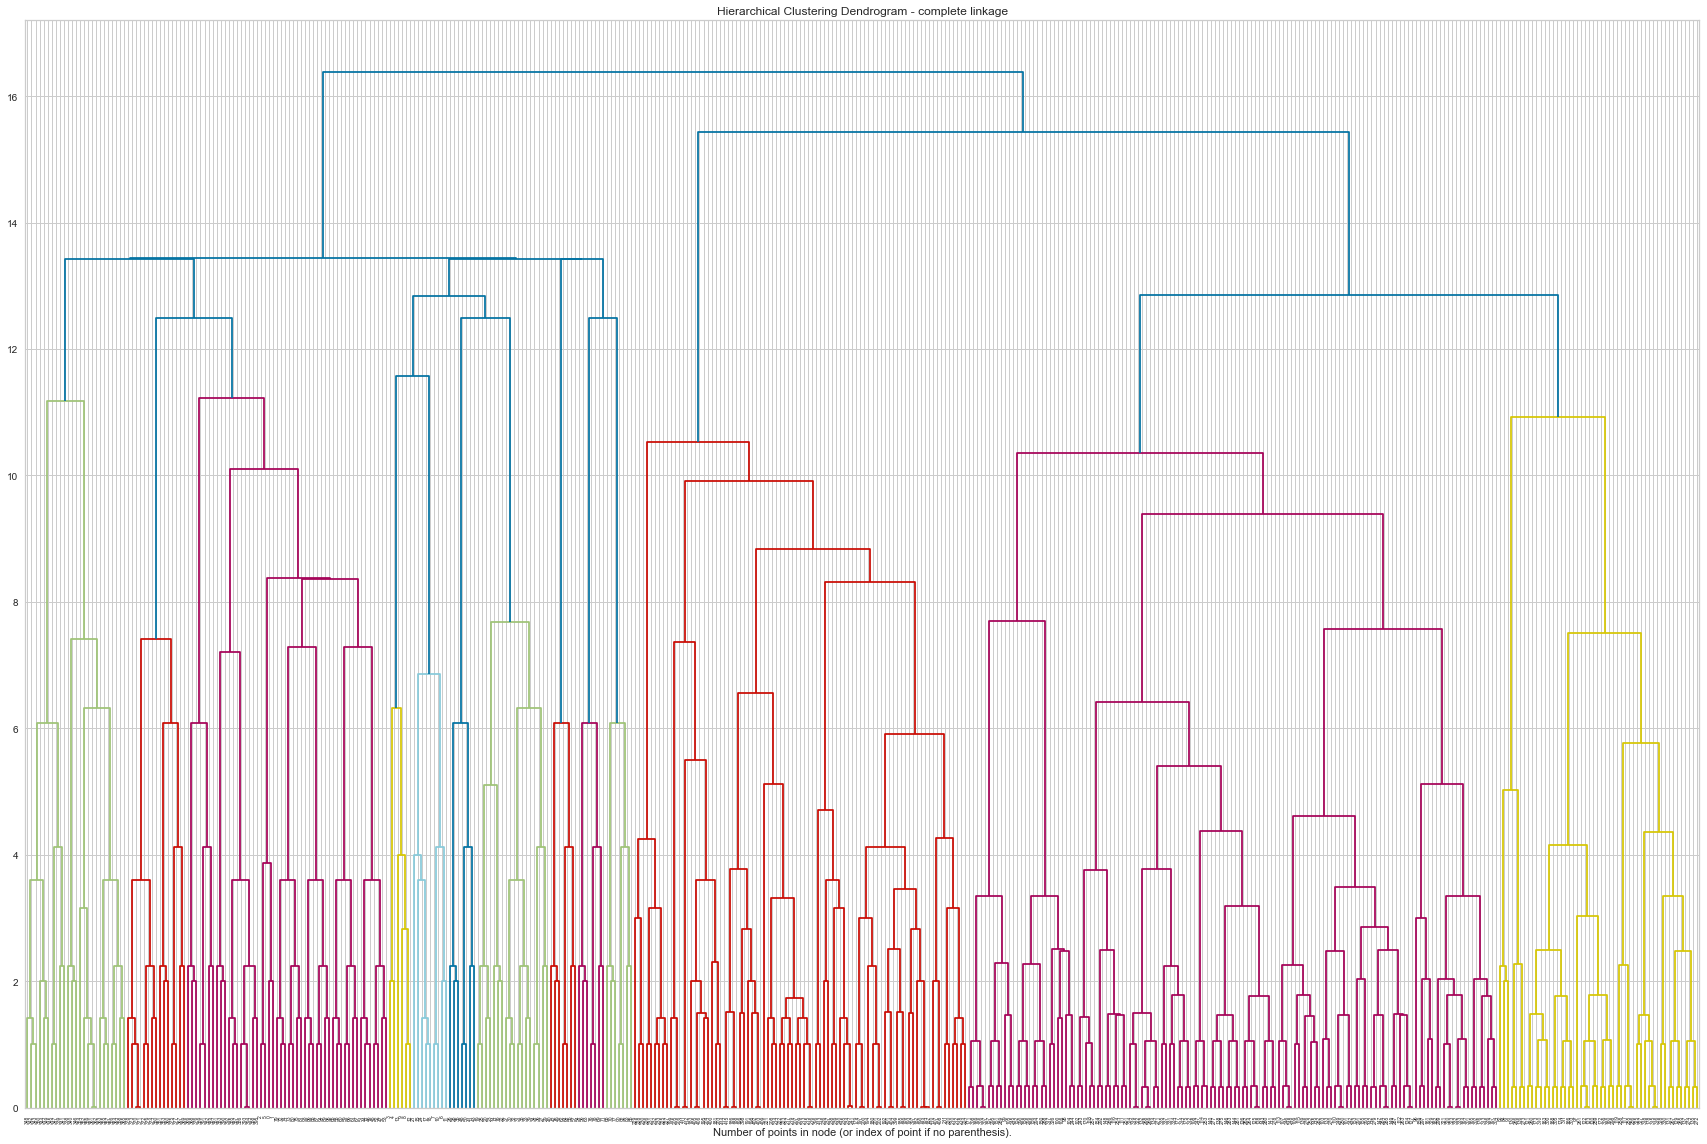

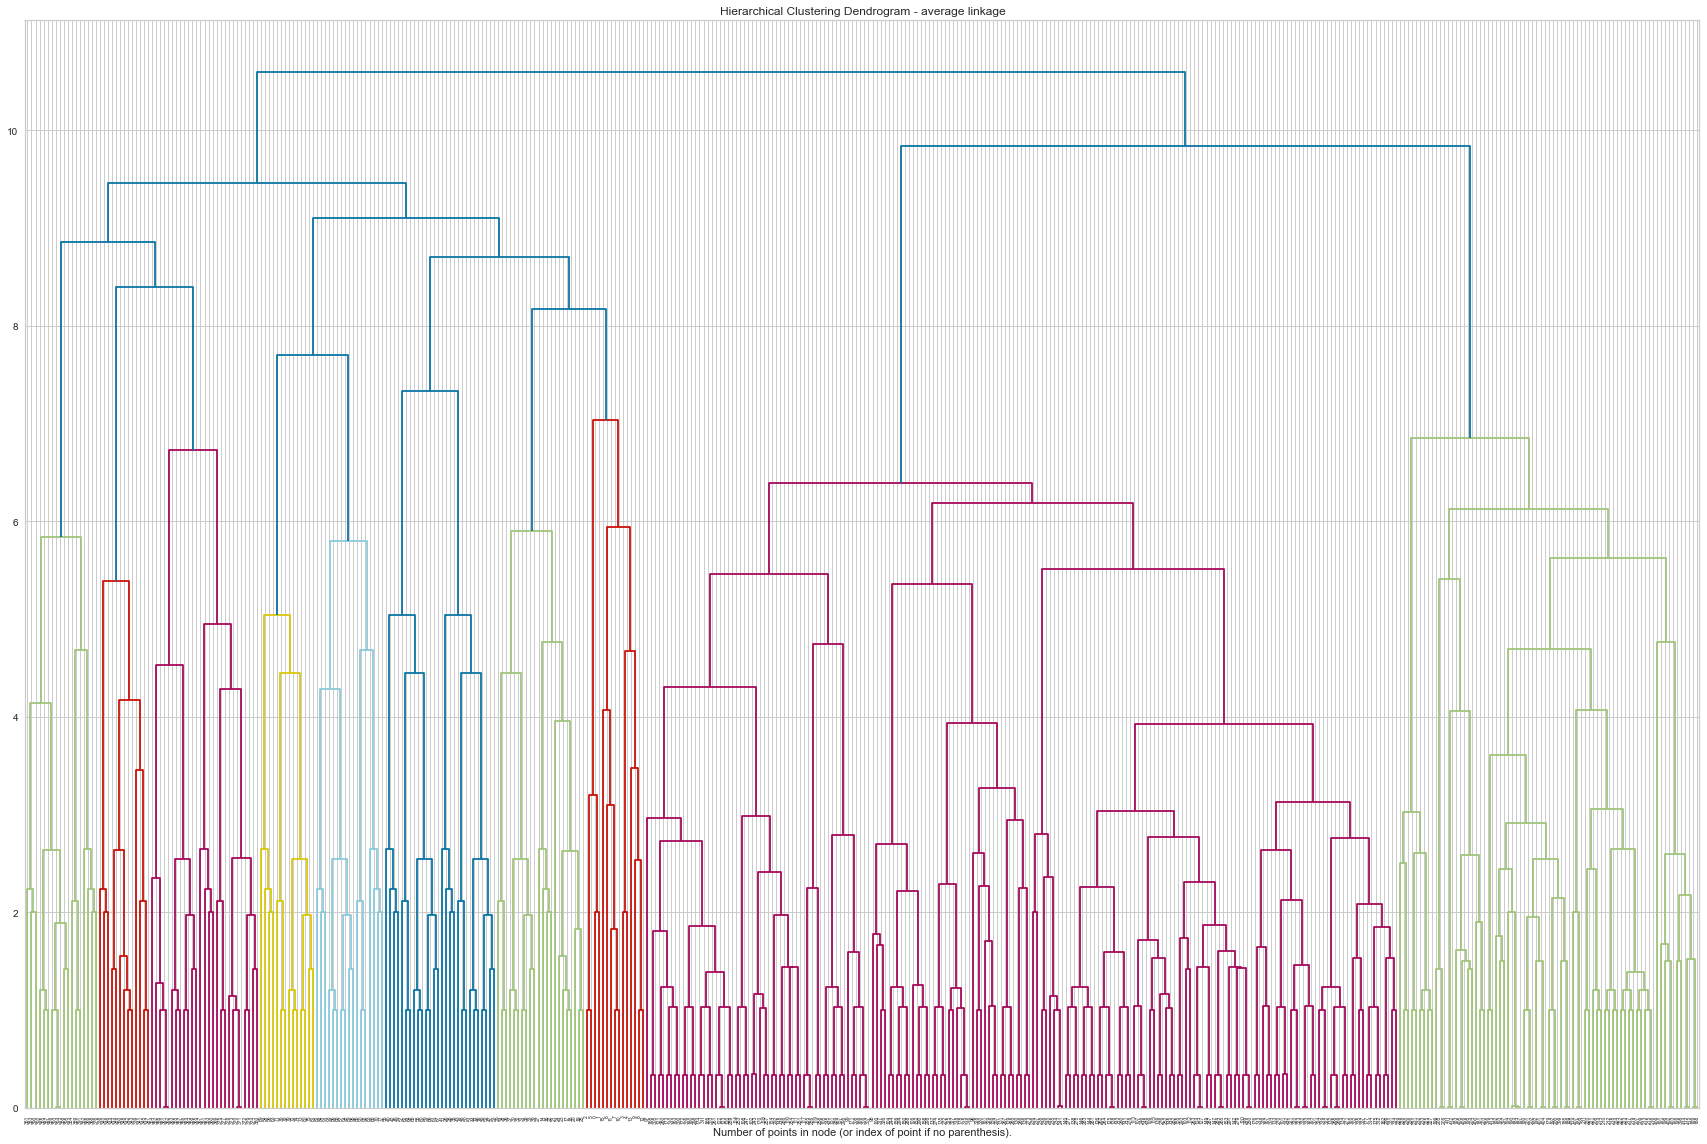

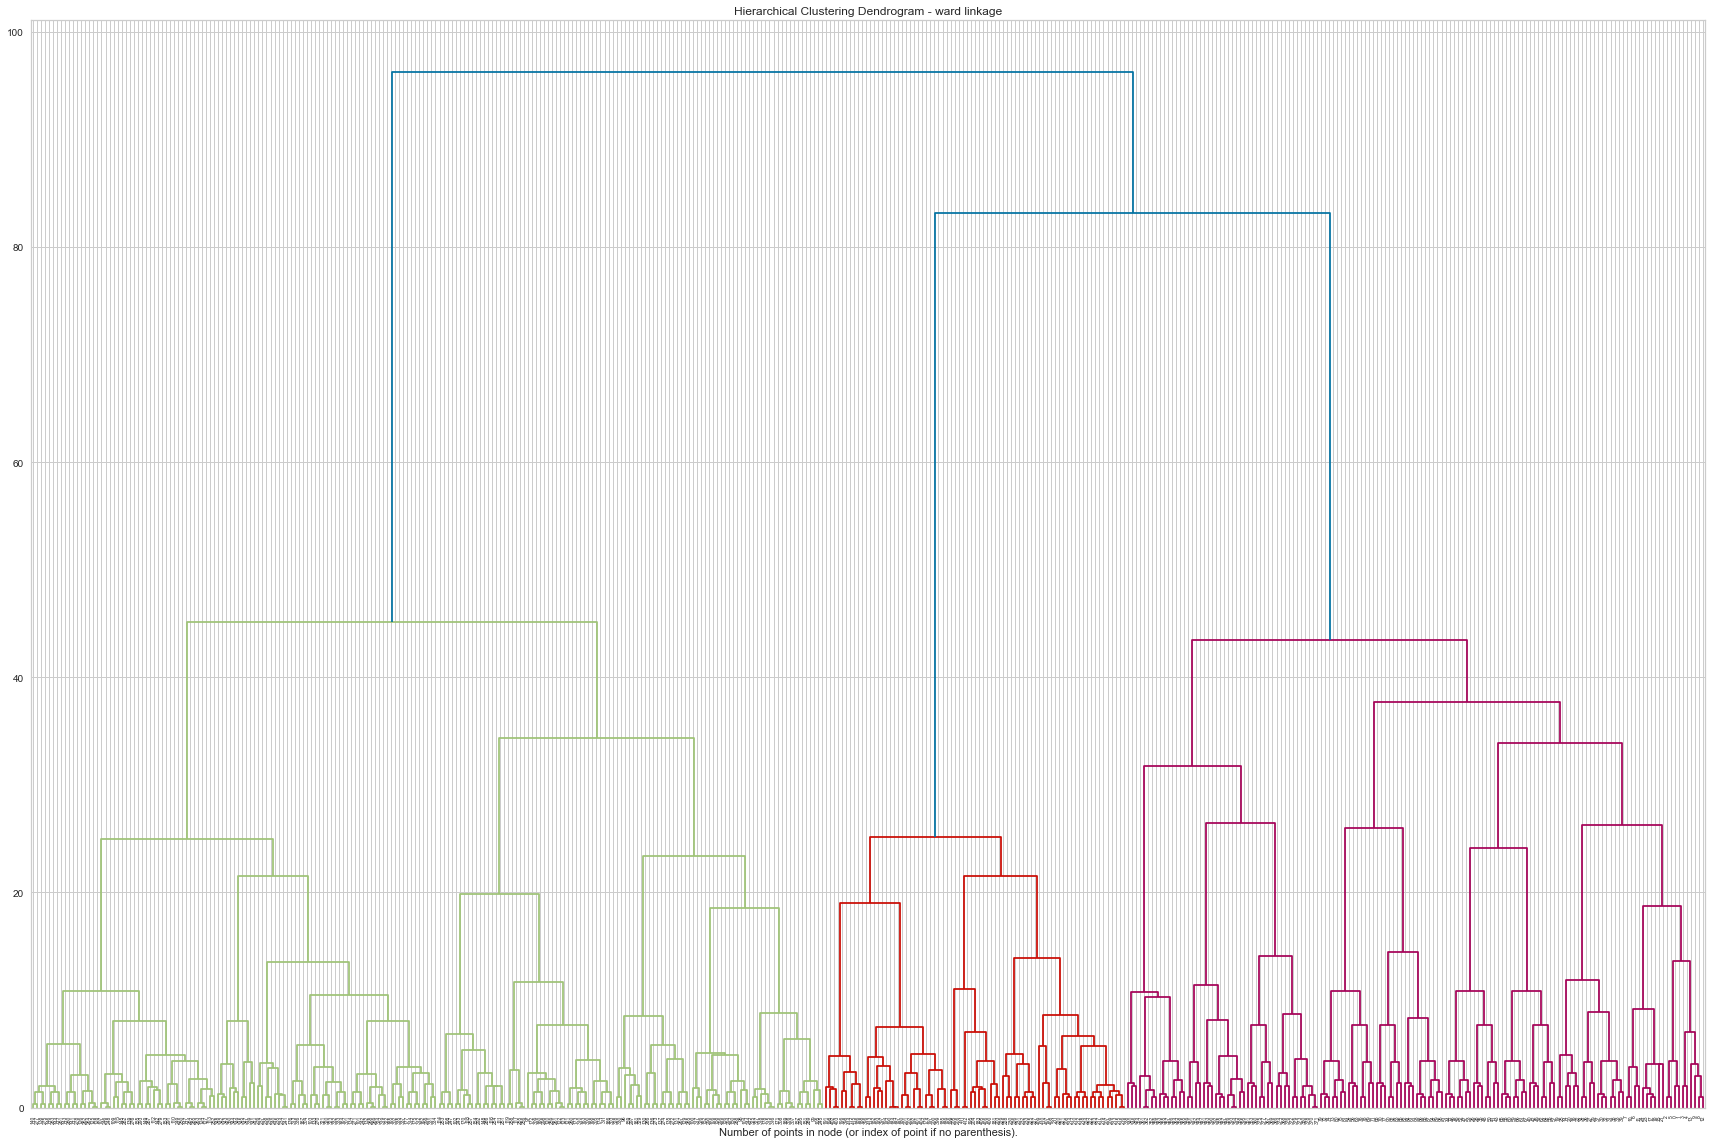

In [44]:
for linkage in ('single', 'complete', 'average', 'ward'):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=linkage)
    model = model.fit(indexed_data)
    plt.figure(figsize=(30,20))
    plt.title(f'Hierarchical Clustering Dendrogram - {linkage} linkage')
    plot_dendrogram(model)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

In [54]:
# print(model.distances_)

# means_lst = []
# for label in range(model.labels_):
#     means_lst.append(sample_silhouette_values[model.labels_ == label].mean())

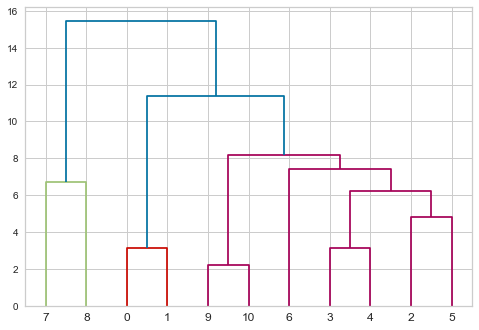

In [72]:
dep = sch.dendrogram(sch.linkage(indexed_data,method='ward'))

In [2]:
agg_clustering = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')

 
#predicting the labels
 
agg_clustering.fit(indexed_data)


score = silhouette_score(indexed_data, agg_clustering.labels_, metric='euclidean')

score



visualizer = SilhouetteVisualizer(agg_clustering, colors='yellowbrick')
# visualizer.fit(X)
 
# #Plotting the results
 

NameError: name 'AgglomerativeClustering' is not defined

In [75]:
score

0.3660225481500202